In [1]:
import numpy as np
import sys
# import sklearn.model_selection as skl
# from sklearn.model_selection import train_test_split
import pickle

from keras.applications.resnet import decode_predictions

import matplotlib
import matplotlib.pyplot as plt
import time
import PIL

import os

from annoy import AnnoyIndex

plt.rcParams["figure.figsize"]=1,1

In [2]:
# https://wiki.python.org/moin/UsingPickle

chunk_1 = pickle.load(open("imagenet_val_1000_encoding_" + str(1) + ".p", "rb") ) 
print(chunk_1.shape)
chunk_2 = pickle.load(open("imagenet_val_1000_encoding_" + str(2) + ".p", "rb") ) 
print(chunk_2.shape)
chunk_3 = pickle.load(open("imagenet_val_1000_encoding_" + str(3) + ".p", "rb") ) 
print(chunk_3.shape)
chunk_4 = pickle.load(open("imagenet_val_1000_encoding_" + str(4) + ".p", "rb") ) 
print(chunk_4.shape)
chunk_5 = pickle.load(open("imagenet_val_1000_encoding_" + str(5) + ".p", "rb") ) 
print(chunk_5.shape)

# encodings = np.concatenate([chunk_1])#, chunk_2, chunk_3, chunk_4, chunk_5], axis = 0)
encodings = np.concatenate([chunk_1, chunk_2, chunk_3, chunk_4, chunk_5], axis = 0)

(10000, 1000)
(10000, 1000)
(10000, 1000)
(10000, 1000)
(10000, 1000)


In [3]:
print(encodings.shape)
# print(encodings[0])
print(np.argmax(encodings[0]))
print(encodings[0][np.argmax(encodings[0])])

(50000, 1000)
48
0.37662745


In [ ]:
# # Use Brute Force:

# # %%timeit

# start_time = time.time()

# first = encodings[2, :]
# dist_from_first = []


# for idx, item in enumerate(encodings):
#     dist_from_first.append((np.linalg.norm(first-item), idx))
        
# dist_from_first.sort()

# end_time = time.time()

# print(end_time - start_time)

# print(dist_from_first)



In [ ]:
# # Use Annoy:

# t = AnnoyIndex(2048, 'euclidean')

# for idx, item in enumerate(encodings):
#     t.add_item(idx, item)
    
# # t.get_nns_by_item(0, 100)
# t.build(100)
# t.save('imagenet_val_encodings.ann')

In [ ]:
# u = AnnoyIndex(2048, 'euclidean')
# u.load('imagenet_val_encodings.ann')


In [ ]:
# start_time = time.time()

# u.get_nns_by_item(0, 1000)

# end_time = time.time()

# print(end_time - start_time)

In [4]:
# Generate corresponding filepaths:

# Generate target directories:
cwd = os.getcwd()
cwd += '/ImageNet/organized_validation_resnet/'

# print(cwd)

files_all = []

for i in range(1,1001):
    files = os.listdir(cwd + str(i))  # Get all the files in that directory
#     print(files)

    files_all += [str(i) + '/' + x for x in files]

print(len(files_all))

50000


In [5]:
files_all

['1/ILSVRC2012_val_00018317.JPEG',
 '1/ILSVRC2012_val_00037383.JPEG',
 '1/ILSVRC2012_val_00011233.JPEG',
 '1/ILSVRC2012_val_00011993.JPEG',
 '1/ILSVRC2012_val_00024327.JPEG',
 '1/ILSVRC2012_val_00024235.JPEG',
 '1/ILSVRC2012_val_00026064.JPEG',
 '1/ILSVRC2012_val_00013716.JPEG',
 '1/ILSVRC2012_val_00048969.JPEG',
 '1/ILSVRC2012_val_00037834.JPEG',
 '1/ILSVRC2012_val_00031333.JPEG',
 '1/ILSVRC2012_val_00040358.JPEG',
 '1/ILSVRC2012_val_00003014.JPEG',
 '1/ILSVRC2012_val_00045880.JPEG',
 '1/ILSVRC2012_val_00031094.JPEG',
 '1/ILSVRC2012_val_00039905.JPEG',
 '1/ILSVRC2012_val_00007197.JPEG',
 '1/ILSVRC2012_val_00010306.JPEG',
 '1/ILSVRC2012_val_00017699.JPEG',
 '1/ILSVRC2012_val_00009111.JPEG',
 '1/ILSVRC2012_val_00046252.JPEG',
 '1/ILSVRC2012_val_00041939.JPEG',
 '1/ILSVRC2012_val_00028158.JPEG',
 '1/ILSVRC2012_val_00034654.JPEG',
 '1/ILSVRC2012_val_00009346.JPEG',
 '1/ILSVRC2012_val_00025527.JPEG',
 '1/ILSVRC2012_val_00023559.JPEG',
 '1/ILSVRC2012_val_00046499.JPEG',
 '1/ILSVRC2012_val_0

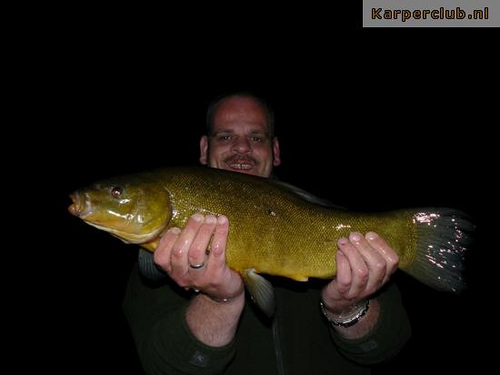

In [6]:
PIL.Image.open(cwd + files_all[5])

In [7]:
encodings.shape

(50000, 1000)

Query Time:
0.49027299880981445


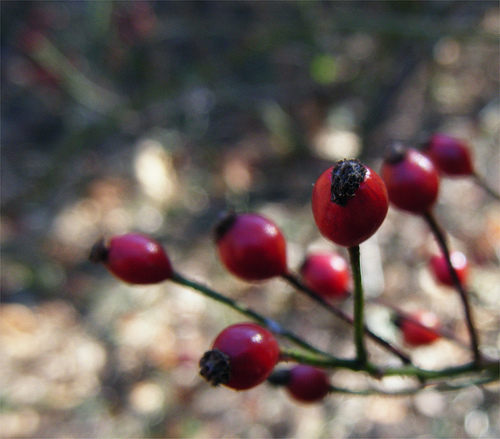

49460


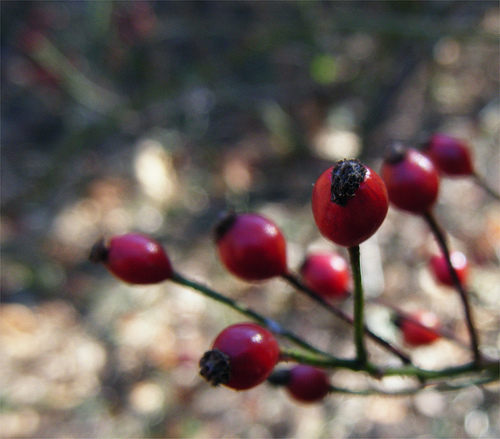

49494


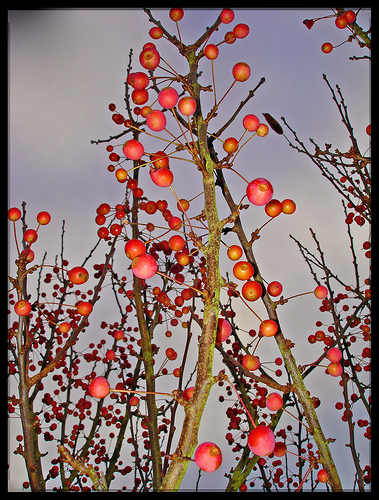

49489


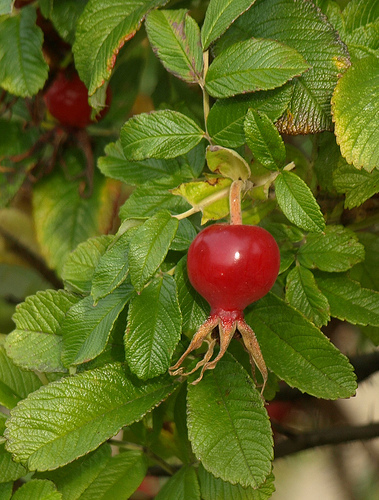

49452


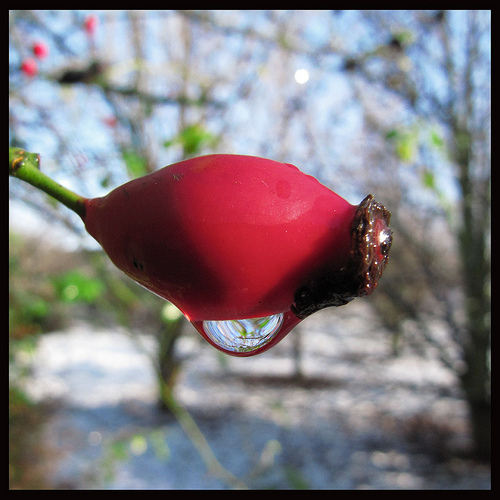

49462


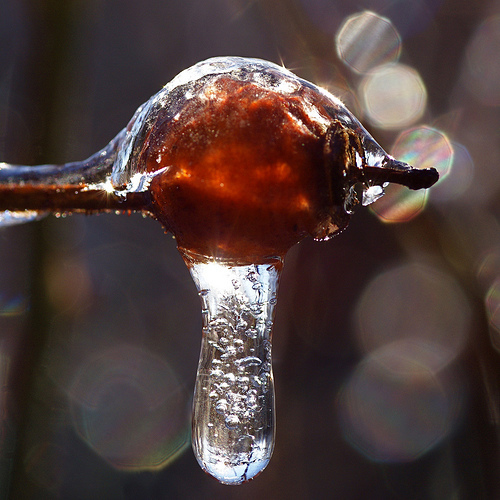

49493


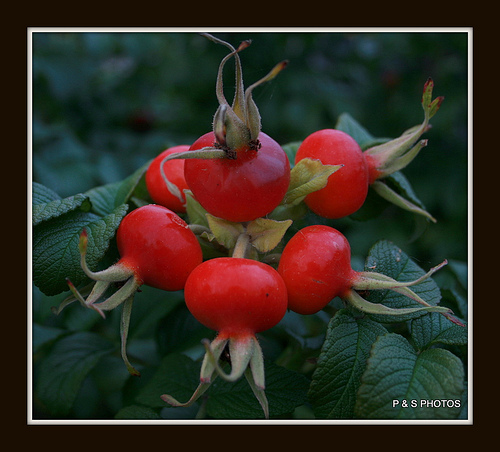

49477


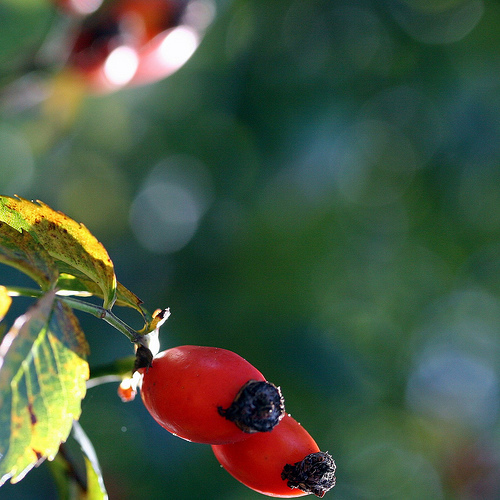

49471


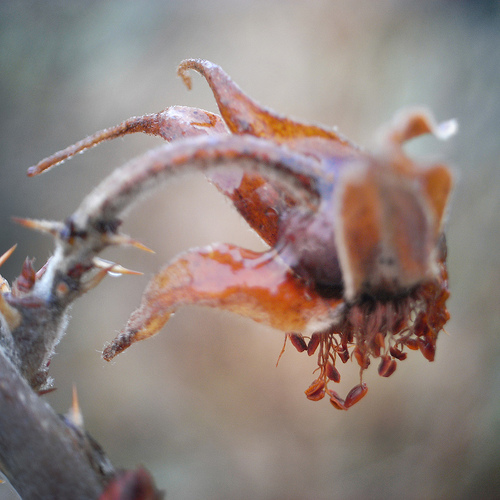

49450


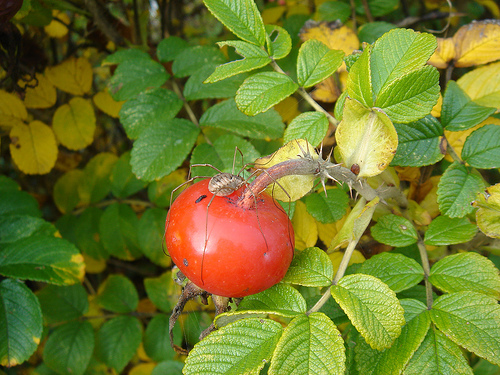

49466


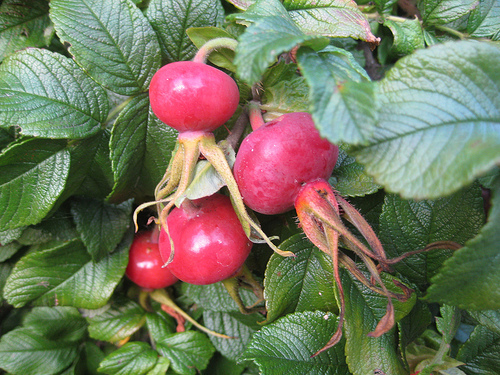

In [20]:
# Use Brute Force:

# %%timeit
def brute_force(query_index, num_nearest_n, encodings):
    start_time = time.time()

    first = encodings[query_index, :]
    dist_from_first = []


    for idx, item in enumerate(encodings):
#         dist_from_first.append((np.linalg.norm((first)/np.linalg.norm(first)-(item)/np.linalg.norm(item)), idx))
        dist_from_first.append((np.linalg.norm((first) - (item)), idx, item))
    
    dist_from_first.sort()
    
#     print(dist_from_first)

    end_time = time.time()

    print('Query Time:')
    print(end_time - start_time)

#     for i in range(10):
#         print(dist_from_first[i][0:2])
    
    query_img = PIL.Image.open(cwd + files_all[query_index])
#     query_img.show()
    display(query_img)
    
#     dist_from_first_np = np.array(dist_from_first)
    
#     print(len(dist_from_first[0][]))
    
    for i in range(num_nearest_n):
        result_index = dist_from_first[i][1]
        print(result_index)
        
#         result_index = np.argmax(dist_from_first_np)
#         print(result_index)
#         result_vector = np.array(result_index[2])
#         print(result_vector)
#         pred = result_vector.reshape(1, 1000)
#         print(dist_from_first[0])
#         decoded = decode_predictions(result_index, top=3)

#         pred = encodings[i].reshape(1, 1000)
#         decoded = decode_predictions(
#                 pred, top=3
#                 )
#         print(decoded)
        
#         print(result_index)
        
        result_img = PIL.Image.open(cwd + files_all[result_index])
#         result_img = PIL.Image.open(cwd + files_all[i])
#         result_img.show()
        display(result_img)


# brute_force(1180, 20, encodings)

# brute_force(190, 20, encodings)

# brute_force(44460, 10, encodings)

brute_force(49460, 10, encodings)